In [1]:
import numpy as np
import os
import pickle

# IMPORTO I DATI PER VOTTIGNASCO

# Ottieni il percorso effettivo da una variabile d'ambiente
work_path = os.environ['WORK']  # Ottieni il valore della variabile d'ambiente WORK
v_test_OHE_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_month_OHE.npy"
v_test_image_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_normalized_image_sequences.npy"
v_test_target_dates_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_target_dates.npy"
v_test_images_dates = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_image_sequences_dates.npy"
v_test_normalization_factors_std_path  = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/normalization_factors/Vottignasco_00425010001_training_target_std.npy"
v_test_normalization_factors_mean_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/normalization_factors/Vottignasco_00425010001_training_target_mean.npy"

# Carica l'array numpy dai file
vottignasco_test_OHE         = np.load(v_test_OHE_path)
vottignasco_test_image       = np.load(v_test_image_path)
vottignasco_test_dates       = np.load(v_test_target_dates_path)
vottignasco_test_image_dates = np.load(v_test_images_dates)
vott_target_test_std         = np.load(v_test_normalization_factors_std_path) 
vott_target_test_mean        = np.load(v_test_normalization_factors_mean_path)


print(len(vottignasco_test_dates))
print(len(vottignasco_test_image))
print(len(vottignasco_test_OHE))

105
105
105


In [2]:
import sys 

# Aggiungi il percorso della cartella XAI (risali di tre livelli dal notebook)
xai_path = os.path.abspath(os.path.join('..', '..', '..'))
sys.path.append(xai_path)

In [3]:
from common import plots

In [27]:
import importlib

# Forza il reload del modulo
importlib.reload(plots)

<module 'common.plots' from '/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/common/plots.py'>

In [24]:
import matplotlib.pyplot as plt

total_auc_insertion_s2_all = []
total_auc_deletion_s2_all  = []


total_auc_insertion_s3_all = []
total_auc_deletion_s3_all  = []

total_auc_insertion_s4_all = []
mean_insertion_errors_s4_all = []
total_auc_deletion_s4_all  = []
mean__deletion_errors_s4_all = []

path_to_load_results = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/results/01_marco_spatial_rise_original_stability20250311154927/rise_spatial_original_stability_all_seeds.pkl"
    # Load della lista results
with open(path_to_load_results, 'rb') as file:
    results = pickle.load(file)

for result in results:

    param = result["parameters_comb"]

    for index_i in range(2,5):
        s_i_errors_insertion = result["errors_insertion"][:,index_i-1,:]
        s_i_errors_deletion  = result["errors_deletion"][:,index_i-1,:]

        output_path = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/scripts/notebooks/results/results_spatial_stability/{param}_S{index_i}"

        #output_path_ins_del = os.path.join(output_dir, f"{param}_ins_del_S_{index_i}.png")
        mean_errors_insertion_s_i,mean_errors_deletion_s_i, auc_insertion_s_i,auc_deletion_s_i = plots.plot_combined_curves_with_errors(s_i_errors_insertion, s_i_errors_deletion, 
                                                                                                                                        title=f"Ins/Del Mean Curves S{index_i}_{param}",
                                                                                                                                        save=True, save_path=output_path)
        plt.close()
        
        if (index_i == 2):
            total_auc_insertion_s2_all.append([auc_insertion_s_i, param])
            total_auc_deletion_s2_all.append([auc_deletion_s_i, param])
            
        elif (index_i == 3):
            total_auc_insertion_s3_all.append([auc_insertion_s_i, param])
            total_auc_deletion_s3_all.append([auc_deletion_s_i, param])
        else:
            total_auc_insertion_s4_all.append([auc_insertion_s_i, param])
            mean_insertion_errors_s4_all.append(mean_errors_insertion_s_i)
            total_auc_deletion_s4_all.append([auc_deletion_s_i, param])
            mean__deletion_errors_s4_all.append(mean_errors_deletion_s_i)

        

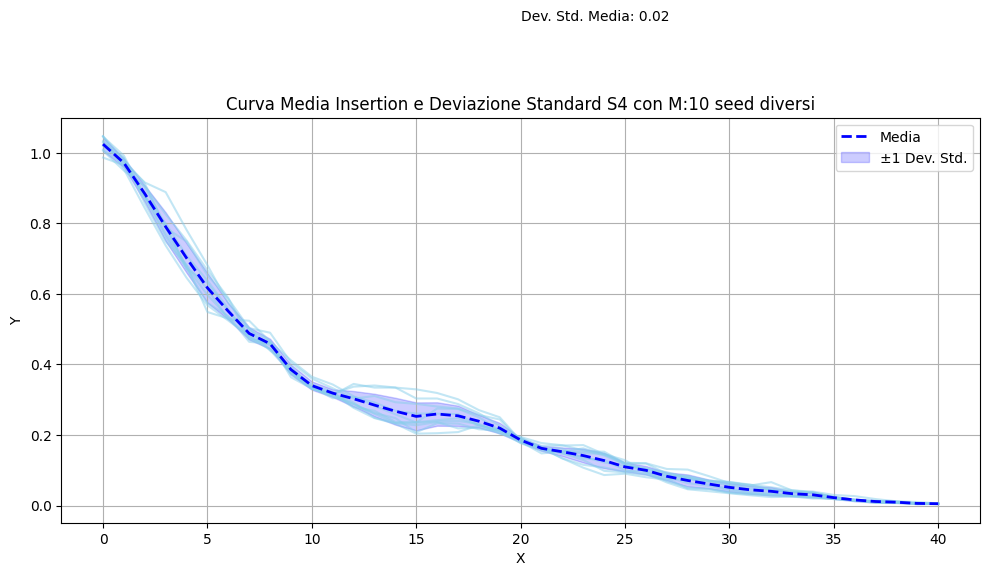

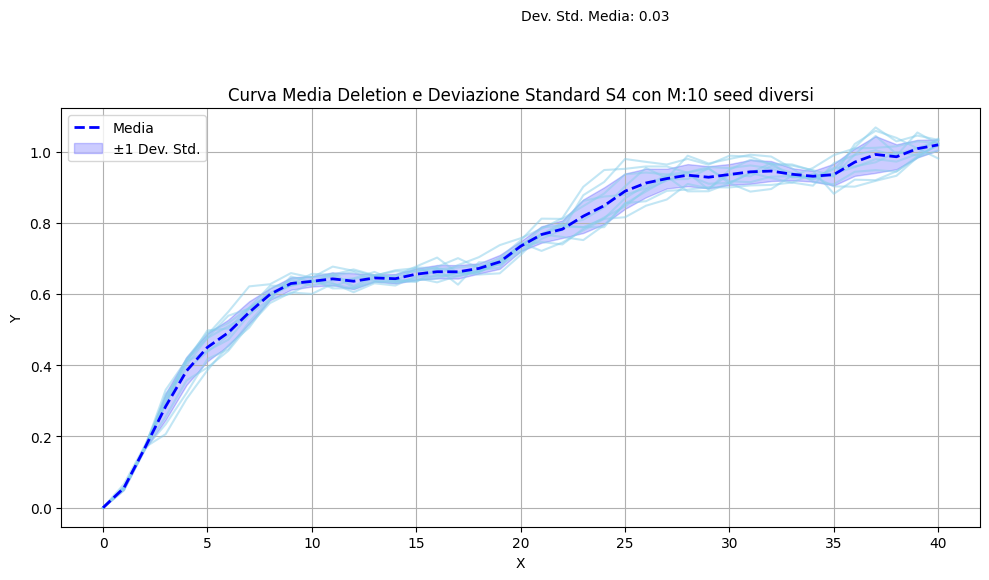

In [28]:
plots.plot_curves_with_stats(mean_insertion_errors_s4_all, title=f"Curva Media Insertion e Deviazione Standard S4 con M:{10} seed diversi")
plots.plot_curves_with_stats(mean__deletion_errors_s4_all, title=f"Curva Media Deletion e Deviazione Standard S4 con M:{10} seed diversi")

plt.close()

### Mean/Std Curves for all seed, all intances

In [2]:
import xarray
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon, box, LineString, MultiLineString
import cmasher as cmr

<Axes: >

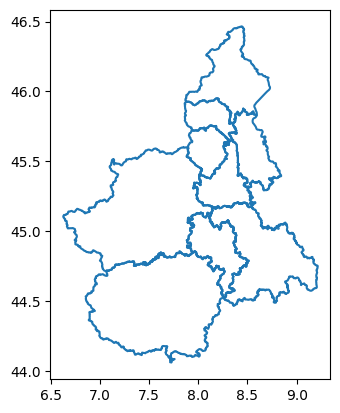

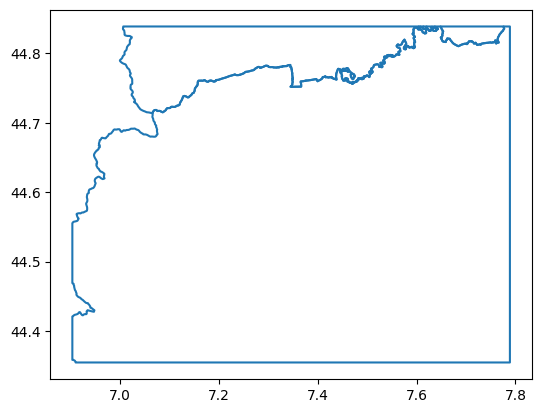

In [3]:
piedmont_shp = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/shapefile_raster/Ambiti_Amministrativi-Province.shp" 

piedmont_bounds = gpd.read_file(piedmont_shp)
piedmont_bounds = piedmont_bounds.to_crs('epsg:4326')
# remove the small enclaved Cuneo area inside Torino province
piedmont_bounds = piedmont_bounds[:-1]

# extract bound, useful for plots
piemonte_long_min, piemonte_lat_min, piemonte_long_max, piemonte_lat_max = piedmont_bounds.total_bounds

piedmont_bounds.boundary.plot()

# Catchment shapefile
catchment = gpd.read_file("/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/shapefile_raster/BAC_01_bacialti.shp") # select GRANA-MAIRA	and VARAITA
catchment = catchment.to_crs('epsg:4326')

# Select only the Grana-Maira catchment
catchment_GM = catchment.loc[catchment.NOME == "GRANA-MAIRA"]
catchment_GM = catchment_GM.reset_index(drop = True)

# Retrieve the borders of the catchment from the shapefile
xmin_clip, ymin_clip, xmax_clip, ymax_clip = catchment_GM.total_bounds
# Extend the borders to include more pixel on the borders

increase = 0.05 # Degrees
#ymin_clip -= increase # not needed
xmin_clip += increase # "+" for subset for pixel included in the mask
xmax_clip += increase
#ymax_clip += increase # not needed

# Define a box around the Region of Interest (ROI)
ROI_box = box(xmin_clip, ymin_clip, xmax_clip , ymax_clip)

ROI_shp = piedmont_bounds.clip(ROI_box)
ROI_shp.boundary.plot()

In [4]:
meteo_ds = xarray.open_dataset("/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/shapefile_raster/meteo_data_ARPA_GM_clipped.nc") # reading ERA5 file
# ARPA Water Table sensors in Cuneo and Torino Provinces
arpa_wt_sensors = gpd.read_file("/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/shapefile_raster/CN_TO_observed_d_t_c_stations.shp")
arpa_wt_sensors = arpa_wt_sensors.to_crs('epsg:4326')
arpa_wt_sensors = arpa_wt_sensors.loc[arpa_wt_sensors.Munic.isin(["Vottignasco"])]

In [5]:
import numpy as np
import xarray
import matplotlib.pyplot as plt
import cmasher as cmr

def plot_saliency_map_matteo(saliency_map, current_instance, data_target, meteo_ds, 
                            catchment, piedmont_bounds, arpa_wt_sensors,
                            cmap='seismic', mode="standard",
                            alpha=0.95, title_prefix='RISE Saliency',
                            save=False, save_path=""):
    """
    Plotta la mappa di salienza con i punti dei sensori WTD.
    
    Parametri:
    - saliency_map: array 2D con i valori di salienza (shape: [lat, lon])
    - current_instance: indice corrente per il titolo
    - data_target: data associata all'istanza
    - meteo_ds: dataset con le coordinate lat e lon
    - catchment: confini del bacino da plottare
    - piedmont_bounds: confini del Piemonte da plottare
    - arpa_wt_sensors: geodataframe con le coordinate dei sensori WTD
    - cmap: colormap da usare (default: 'seismic')
    - mode: "standard" per la colormap normale, "reversed" per invertirla
    - alpha: trasparenza della mappa (default: 0.95)
    - title_prefix: prefisso del titolo (default: 'Spatial saliency')
    - save: se True, salva il grafico invece di mostrarlo
    - save_path: percorso dove salvare il grafico
    """
    
    # Converti in DataArray per compatibilità con xarray
    xarray_saliency = xarray.DataArray(
        data=saliency_map,
        dims=["y", "x"],
        coords=dict(y=("y", meteo_ds.coords["lat"].values),
                    x=("x", meteo_ds.coords["lon"].values))
    )
    
    vmin = np.min(xarray_saliency)
    vmax = np.max(xarray_saliency)

    # Seleziona la colormap (invertita o normale)
    selected_cmap = cmr.get_sub_cmap(cmap, 0.5, 1)
    if mode == "reversed":
        selected_cmap = selected_cmap.reversed()

    # Setup del plot
    fig, ax = plt.subplots()
    catchment.boundary.plot(ax=ax, color="Blue", linewidth=0.1, alpha=1)
    piedmont_bounds.boundary.plot(ax=ax, color='Black', linewidth=0.5, alpha=0.6)
    
    # Plotta la mappa di salienza
    xarray_saliency.plot(ax=ax, cmap=selected_cmap, vmin=vmin, vmax=vmax, alpha=alpha)

    # Plotta i sensori WTD come puntini gialli
    arpa_wt_sensors.plot(ax=ax, color='tab:blue', marker='o', markersize=50, label='WTD Sensor', alpha=1)

    # # Annotazioni per i sensori WTD
    # for x, y in zip(arpa_wt_sensors.geometry.x.values, arpa_wt_sensors.geometry.y.values):
    #     ax.annotate("WTD Sensor",
    #                 xy=(x, y), xycoords='data',
    #                 xytext=(x - 0.1, y + 0.15), textcoords='data',
    #                 size=12, va="center", ha="center",
    #                 bbox=dict(fc="w"),
    #                 arrowprops=dict(arrowstyle="-|>",
    #                                 connectionstyle="arc3,rad=-0.2",
    #                                 fc="w"))
    
    # Titolo del grafico
    fig.suptitle(f'{title_prefix} #{current_instance} Date Target: [{data_target[0]}]', fontsize=12)
    
    # Salvataggio o visualizzazione
    if save:
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.savefig(save_path, dpi=400)
        plt.close(fig)
    else:
        plt.show()


In [6]:
import pickle 
import numpy as np

path_to_load_results = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/results/01_marco_spatial_rise_original_stability20250311154927/rise_spatial_original_stability_all_seeds.pkl"
    # Load della lista results
with open(path_to_load_results, 'rb') as file:
    results = pickle.load(file)


for nr_instance in range(79,len(vottignasco_test_image)):

    data_target = vottignasco_test_dates[nr_instance].astype('datetime64[D]')

    for index_i in range(2,5):
        output_path_mean = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/scripts/notebooks/results/results_spatial_stability_mean/#{nr_instance}_S{index_i}_mean"
        output_path_std  = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial/scripts/notebooks/results/results_spatial_stability_std/#{nr_instance}_S{index_i}_std"

        all_nr_instances_instances_s_i = np.zeros((10,5,8))
        
        for nr_result,result in enumerate(results):

            all_nr_instances_instances_s_i[nr_result] = result["saliency_maps"][nr_instance,(index_i-1),:]
        
        s_i_mean_all_seed_instance_nr_instance = np.mean(all_nr_instances_instances_s_i, axis=0)
        s_i_std_all_seed_instance_nr_instance  = np.std(all_nr_instances_instances_s_i, axis=0)

        if index_i == 1 or index_i == 3:
            mode_mean = "standard"
        else:
            mode_mean = "reversed"

        plot_saliency_map_matteo(s_i_mean_all_seed_instance_nr_instance, nr_instance, data_target, meteo_ds, 
                         catchment, piedmont_bounds, arpa_wt_sensors, mode=mode_mean,title_prefix=f"RISE Saliency Mean,",
                         save=True, save_path=output_path_mean)
        plot_saliency_map_matteo(s_i_std_all_seed_instance_nr_instance, nr_instance, data_target, meteo_ds, 
                         catchment, piedmont_bounds, arpa_wt_sensors, mode="reversed",title_prefix=f"RISE Saliency Std,",
                         save=True, save_path=output_path_std)
        
    print(f"END {nr_instance}")
        
    

END 79
END 80
END 81
END 82
END 83
END 84
END 85
END 86
END 87
END 88
END 89
END 90
END 91
END 92
END 93
END 94
END 95
END 96
END 97
END 98
END 99
END 100
END 101
END 102
END 103
END 104
